# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [2]:
#seu código aqui
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [4]:
df_imoveis = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df_imoveis

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [15]:
X = df_imoveis[['Metragem']]

In [17]:
y = df_imoveis['Valor_Aluguel']

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [20]:
#seu código aqui
poly_features = PolynomialFeatures(degree=2)

In [22]:
x_poly = poly_features.fit_transform(X)

In [24]:
x_poly

array([[1.0000e+00, 4.8000e+01, 2.3040e+03],
       [1.0000e+00, 5.0000e+01, 2.5000e+03],
       [1.0000e+00, 4.0000e+01, 1.6000e+03],
       ...,
       [1.0000e+00, 2.6600e+02, 7.0756e+04],
       [1.0000e+00, 6.0000e+02, 3.6000e+05],
       [1.0000e+00, 2.4800e+02, 6.1504e+04]])

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [29]:
#seu código aqui
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_test: (1441, 3)
Tamanho de y_test: (1441,)


# 4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


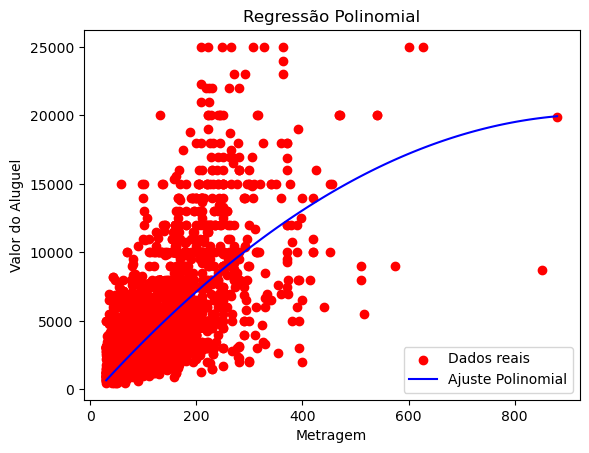

In [37]:
#seu código aqui
y_pred = model.predict(x_test)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred_linear = model.predict(x_test)

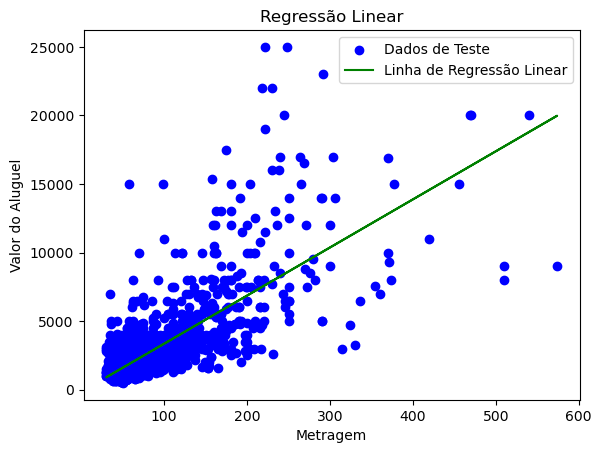

In [45]:
plt.scatter(x_test, y_test, color='blue', label='Dados de Teste')  # Dados de teste
plt.plot(x_test, y_pred_linear, color='green', label='Linha de Regressão Linear')  # Linha de regressão
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear')
plt.legend()
plt.show()

In [47]:
r2_linear = r2_score(y_test, y_pred_linear)
print(f'R² da Regressão Linear: {r2_linear:.4f}')

R² da Regressão Linear: 0.5349


In [49]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.5423


O modelo de Regressão Polinomial quase não tem diferença para a Linear utilizando a transformação de grau 2, com menos de 0.01 de diferença.

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [51]:
#seu código aqui
poly_features = PolynomialFeatures(degree=5)

In [53]:
x_poly = poly_features.fit_transform(X)

In [55]:
x_poly

array([[1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06, 2.54803968e+08],
       [1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05,
        6.25000000e+06, 3.12500000e+08],
       [1.00000000e+00, 4.00000000e+01, 1.60000000e+03, 6.40000000e+04,
        2.56000000e+06, 1.02400000e+08],
       ...,
       [1.00000000e+00, 2.66000000e+02, 7.07560000e+04, 1.88210960e+07,
        5.00641154e+09, 1.33170547e+12],
       [1.00000000e+00, 6.00000000e+02, 3.60000000e+05, 2.16000000e+08,
        1.29600000e+11, 7.77600000e+13],
       [1.00000000e+00, 2.48000000e+02, 6.15040000e+04, 1.52529920e+07,
        3.78274202e+09, 9.38120020e+11]])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [59]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [61]:
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_test: (1441, 6)
Tamanho de y_test: (1441,)


C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


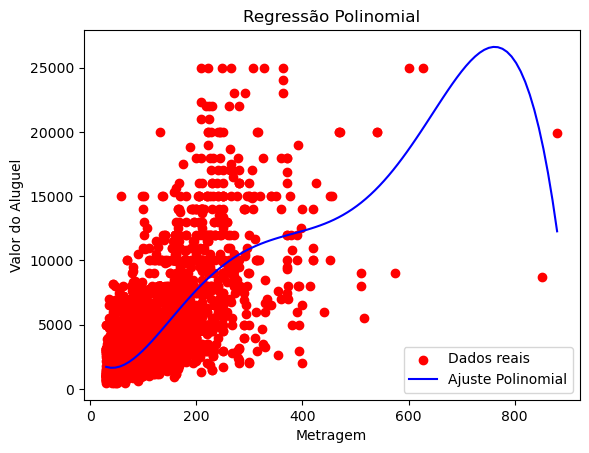

In [63]:
y_pred = model.predict(x_test)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred_linear = model.predict(x_test)

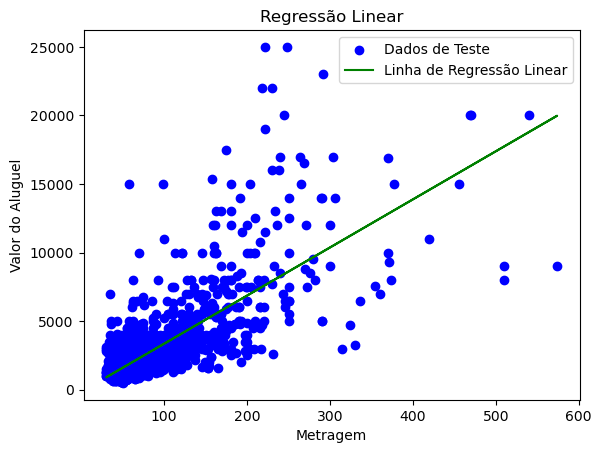

In [71]:
plt.scatter(x_test, y_test, color='blue', label='Dados de Teste')  # Dados de teste
plt.plot(x_test, y_pred_linear, color='green', label='Linha de Regressão Linear')  # Linha de regressão
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear')
plt.legend()
plt.show()

In [73]:
r2_linear = r2_score(y_test, y_pred_linear)
print(f'R² da Regressão Linear: {r2_linear:.4f}')

R² da Regressão Linear: 0.5349


In [75]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.5631


Sim, o resultado desse modelo está melhor em relação ao anterior.

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

A Regressão Lasso é um método de regressão que utiliza da L1 para penalização, excluindo variáveis dispensáveis, ajudando assim a prevenir o overfitting. Já a Regressão Ridge, utiliza do L2 para penalização, que faz com que as variáveis sejam reduzidas quase a 0, mas nunca as excluindo, é melhor em casos de multicolinearidade. E a Regressão Elastic Net é uma junção das duas, combinando as duas penalizações, e é bem útil em dados mais complexos, principalmente quando há correlação entre variáveis, sendo ele o mais completo entre os três.